In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)
# Generate synthetic data
n_rows = 10000
categories = ['Electronics', 'Clothing', 'Books', 'Home & Kitchen', 'Toys']
payment_methods = ['Credit Card', 'PayPal', 'Cash', 'Debit Card']
regions = ['North', 'South', 'East', 'West']
genders = ['Male', 'Female', 'Other']
data = {
'Order_ID': range(1, n_rows + 1),
'Customer_ID': ['C' + str(i).zfill(5) for i in range(1, n_rows + 1)],
'Product': [f'Product_{i}' for i in range(1, n_rows + 1)],
'Category': [random.choice(categories) for _ in range(n_rows)],
'Quantity': np.random.randint(1, 10, n_rows),
'Price': np.round(np.random.uniform(5, 500, n_rows), 2),
'Order_Date': [(datetime(2023, 1, 1) + timedelta(days=random.randint(0, 730))).strftime('%Y-%m-%d') for _ in range(n_rows)],
'Customer_Age': np.random.randint(18, 80, n_rows),
'Customer_Gender': [random.choice(genders) for _ in range(n_rows)],
'Region': [random.choice(regions) for _ in range(n_rows)],
'Payment_Method': [random.choice(payment_methods) for _ in range(n_rows)],
}
df = pd.DataFrame(data)
df['Total_Amount'] = df['Quantity'] * df['Price']
# Introduce missing values (5% of cells)
for col in ['Customer_Age', 'Customer_Gender', 'Price', 'Region']:
    mask = np.random.random(n_rows) < 0.05
df.loc[mask, col] = np.nan
# Introduce duplicates (1% of rows)
n_duplicates = int(n_rows * 0.01)
duplicate_rows = df.sample(n_duplicates)
df = pd.concat([df, duplicate_rows], ignore_index=True)
# Introduce inconsistencies
df.loc[df.sample(frac=0.02).index, 'Price'] = -df['Price'] # Negative prices
df.loc[df.sample(frac=0.02).index, 'Order_Date'] = '2025-13-45' # Invalid dates
# Save dataset
df.to_csv('ecommerce_sales.csv', index=False)

#Task 1: **Data Cleaning**

1. Load Dataset

In [3]:
df = pd.read_csv('ecommerce_sales.csv')

In [4]:
df

,Order_ID,Customer_ID,Product,Category,Quantity,Price,Order_Date,Customer_Age,Customer_Gender,Region,Payment_Method,Total_Amount
0,1,C00001,Product_1,Electronics,7,181.67,2024-08-22,20,Female,South,Cash,1271.69
1,2,C00002,Product_2,Electronics,4,58.60,2023-08-29,58,Female,North,Credit Card,234.40
2,3,C00003,Product_3,Books,8,213.33,2025-13-45,46,Male,East,Credit Card,1706.64
3,4,C00004,Product_4,Clothing,5,364.92,2024-05-11,54,Other,NaN,Credit Card,1824.60
4,5,C00005,Product_5,Clothing,7,58.11,2024-11-19,72,Other,South,Cash,406.77
...,...,...,...,...,...,...,...,...,...,...,...,...
10095,9605,C09605,Product_9605,Toys,5,205.24,2023-07-02,67,Female,West,Cash,1026.20
10096,7410,C07410,Product_7410,Toys,4,383.76,2023-02-01,49,Female,South,Cash,1535.04
10097,1410,C01410,Product_1410,Home & Kitchen,4,391.36,2024-06-12,64,Other,South,Cash,1565.44
10098,5876,C05876,Product_5876,Clothing,1,285.55,2024-08-28,59,Male,North,Debit Card,285.55


2. **Handle Missing Values:**

    Identify columns with missing values and compute the percentage of missing data for each.
    For Customer_Age , impute missing values with the median age.
    For Customer_Gender , impute missing values with the mode.
    For Price , impute missing values with the median price of the corresponding Category.






In [5]:
total_rows = df.shape[0]

missing_values = df.isnull().sum(axis=0)

missing_percentage = (missing_values / total_rows) * 100
missing_percentage

,0
Order_ID,0.000000
Customer_ID,0.000000
Product,0.000000
Category,0.000000
Quantity,0.000000
Price,0.000000
Order_Date,0.000000
Customer_Age,0.000000
Customer_Gender,0.000000
Region,4.851485


3. **Remove Duplicates:**

Identify and remove duplicate rows based on all columns.


In [6]:
df = df.drop_duplicates()

In [7]:
df

,Order_ID,Customer_ID,Product,Category,Quantity,Price,Order_Date,Customer_Age,Customer_Gender,Region,Payment_Method,Total_Amount
0,1,C00001,Product_1,Electronics,7,181.67,2024-08-22,20,Female,South,Cash,1271.69
1,2,C00002,Product_2,Electronics,4,58.60,2023-08-29,58,Female,North,Credit Card,234.40
2,3,C00003,Product_3,Books,8,213.33,2025-13-45,46,Male,East,Credit Card,1706.64
3,4,C00004,Product_4,Clothing,5,364.92,2024-05-11,54,Other,NaN,Credit Card,1824.60
4,5,C00005,Product_5,Clothing,7,58.11,2024-11-19,72,Other,South,Cash,406.77
...,...,...,...,...,...,...,...,...,...,...,...,...
10075,7489,C07489,Product_7489,Books,9,478.35,2025-13-45,38,Female,North,Credit Card,4305.15
10083,3044,C03044,Product_3044,Home & Kitchen,8,437.26,2024-07-09,34,Male,East,Credit Card,3498.08
10089,5845,C05845,Product_5845,Electronics,5,207.91,2023-03-20,22,Female,South,PayPal,1039.55
10094,7927,C07927,Product_7927,Toys,9,213.57,2025-13-45,36,Male,West,Credit Card,1922.13



4. **Fix Inconsistencies:**

    Convert Order_Date to a datetime format. Identify and handle invalid dates (e.g., replace with the nearest valid date or drop).
    Ensure Price and Total_Amount are non-negative. Correct or drop rows with negative values.
    Verify that Total_Amount equals Quantity * Price . Fix discrepancies.



In [8]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

/tmp/ipython-input-356155431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')


In [9]:
df['Order_Date'] = df['Order_Date'].fillna(method='bfill')

/tmp/ipython-input-731002073.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Order_Date'] = df['Order_Date'].fillna(method='bfill')
/tmp/ipython-input-731002073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_Date'] = df['Order_Date'].fillna(method='bfill')


In [10]:
# Ensure 'Price' and 'Total_Amount' are non-negative

# Write a code to convert negative values with positive values (reducing - from the value)
df['Price'] = df['Price'].abs()
df['Total_Amount'] = df['Total_Amount'].abs()

/tmp/ipython-input-419143782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].abs()
/tmp/ipython-input-419143782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Amount'] = df['Total_Amount'].abs()


In [11]:
# Find out the rows where (quantity * price != total_amount)
mask = ~np.isclose(df['Total_Amount'], df['Quantity'] * df['Price'])
df[mask]

,Order_ID,Customer_ID,Product,Category,Quantity,Price,Order_Date,Customer_Age,Customer_Gender,Region,Payment_Method,Total_Amount


**Save Cleaned Data:**

Save the cleaned dataset as ecommerce_sales_cleaned.csv


In [15]:
#However, we are removing some other data that is not stated in the questions before saving it.
#Replacing the missing values of the region column with the previous value

df['Region'] = df['Region'].fillna(method='bfill')

/tmp/ipython-input-3864648178.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Region'] = df['Region'].fillna(method='bfill')
/tmp/ipython-input-3864648178.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = df['Region'].fillna(method='bfill')


In [13]:
# Rounding the total amount upto 2 decimal points
df['Total_Amount'] = (df['Total_Amount']).round(2)

/tmp/ipython-input-114680691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Amount'] = (df['Total_Amount']).round(2)


In [16]:
df.to_csv('ecommerce_sales_cleaned.csv')

#Task 2: **Exploratory Data Analysis (EDA)**

1. Summary Statistics:

    Compute descriptive statistics (mean, median, std, min, max) for Quantity , Price , Total_Amount and Customer_Age using NumPy or Pandas.
    Group by Category and compute the average Total_Amount and total Quantity sold.

In [17]:
cols = ['Quantity', 'Price', 'Total_Amount', 'Customer_Age']
descriptive = (df[cols].describe()).round(2)

median_row = df[cols].median()
median_row.name = 'median'

descriptive = pd.concat([descriptive, pd.DataFrame(median_row).T])

In [18]:
descriptive

,Quantity,Price,Total_Amount,Customer_Age
count,10010.00,10010.000,10010.00,10010.00
mean,4.99,251.360,1251.79,48.53
std,2.59,141.950,1028.56,17.86
min,1.00,5.000,5.00,18.00
25%,3.00,129.920,408.30,33.00
50%,5.00,251.040,960.62,49.00
75%,7.00,371.990,1877.98,64.00
max,9.00,499.950,4498.38,79.00
median,5.00,251.045,960.62,49.00


In [19]:
# Group by categorical
# Compute the average of tatal amount and total quantity sold
grouped = (df.groupby('Category')[['Total_Amount', 'Quantity']].mean()).round(2)
sorted_df = grouped.sort_values(by='Total_Amount', ascending=False)
sorted_df

,Total_Amount,Quantity
Category,,
Home & Kitchen,1282.91,5.05
Electronics,1251.44,5.04
Toys,1249.47,5.02
Books,1244.69,4.90
Clothing,1229.07,4.95



2. **Distribution Analysis:**

    Create histograms for Price , Total_Amount , and Customer_Age using Matplotlib. Use appropriate bin sizes.
    Plot a boxplot of Total_Amount by Category to identify outliers.



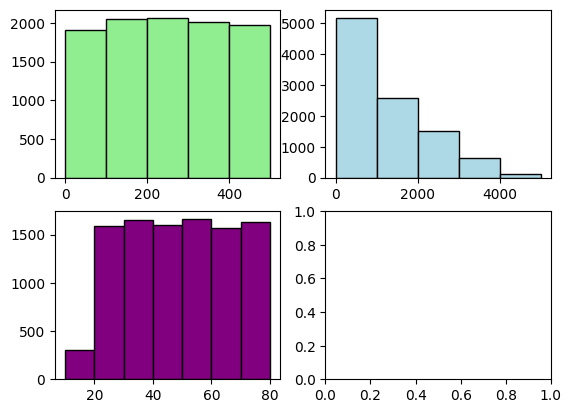

In [20]:
import matplotlib.pyplot as plt
# Create Histograms for Price, Total_Amount and Customer_Age
    # I am thinking of making histogras for each using subplots
cols = ['Price', 'Total_Amount', 'Customer_Age']
price_bins = [0, 100, 200, 300, 400, 500]
total_amount_bins = [1, 1000, 2000, 3000, 4000, 5000]
age_bins = [10, 20, 30, 40, 50, 60, 70, 80]

fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(df['Price'], bins=price_bins, color='lightgreen', edgecolor='black')
axs[0, 1].hist(df['Total_Amount'], bins=total_amount_bins, color='lightblue', edgecolor='black')
axs[1, 0].hist(df['Customer_Age'], bins=age_bins, color='purple', edgecolor='black')
plt.show()

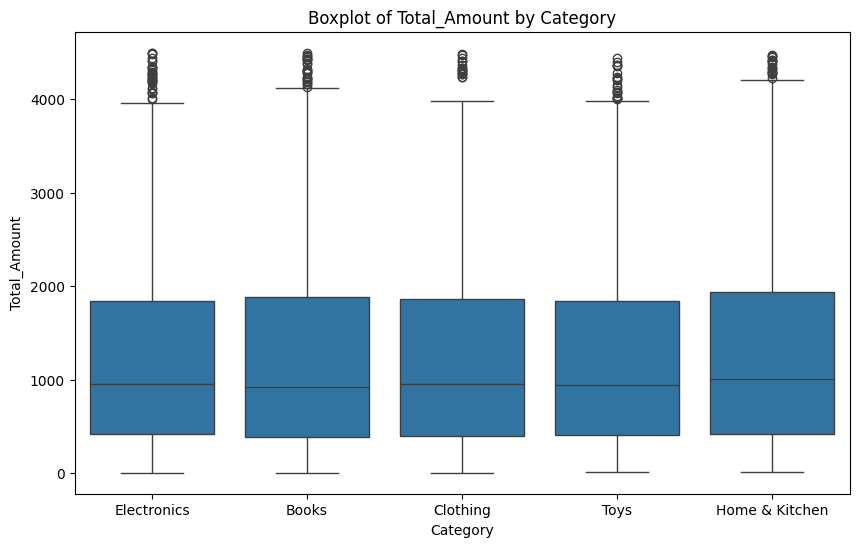

In [21]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(x='Category', y='Total_Amount', data=df)

plt.title('Boxplot of Total_Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total_Amount')

# Show the plot
plt.show()

3. **Categorical Analysis:**

    Compute the frequency of each Category , Region , Payment_Method , and Customer_Gender.
    Create bar plots to visualize the top 5 products by total sales ( Total_Amount ).

In [22]:
df['Category'].value_counts().sort_values(ascending=False).reset_index()

,Category,count
0,Home & Kitchen,2072
1,Toys,2002
2,Clothing,1989
3,Electronics,1978
4,Books,1969


In [23]:
df['Region'].value_counts().sort_values(ascending=False).reset_index()

,Region,count
0,West,2557
1,East,2522
2,North,2485
3,South,2446


In [24]:
df['Payment_Method'].value_counts().sort_values(ascending=False).reset_index()

,Payment_Method,count
0,Debit Card,2613
1,Credit Card,2497
2,Cash,2496
3,PayPal,2404


In [25]:
df['Customer_Gender'].value_counts().sort_values(ascending=False).reset_index()

,Customer_Gender,count
0,Male,3457
1,Other,3289
2,Female,3264


<Axes: xlabel='Product', ylabel='Total_Amount'>

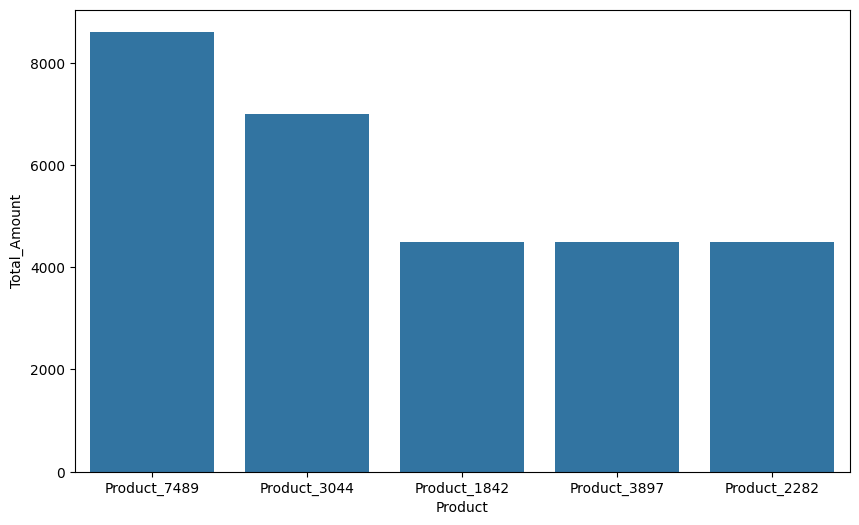

In [26]:
# Create a bar plot to visualize the top 5 products by total sales (Total Amount)
top_products = df.groupby('Product')['Total_Amount'].sum().sort_values(ascending=False).head(5)
top_products = top_products.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Total_Amount', data=top_products)

4. **Time-Based Analysis:**

    Extract the year and month from Order_Date .
    Plot the total Total_Amount by month using a line plot.
    Identify the month with the highest sales.

In [27]:
df['year'] = pd.DatetimeIndex(df['Order_Date']).year

/tmp/ipython-input-433919527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df['Order_Date']).year


In [28]:
df['month'] = pd.DatetimeIndex(df['Order_Date']).month

/tmp/ipython-input-2142376183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.DatetimeIndex(df['Order_Date']).month


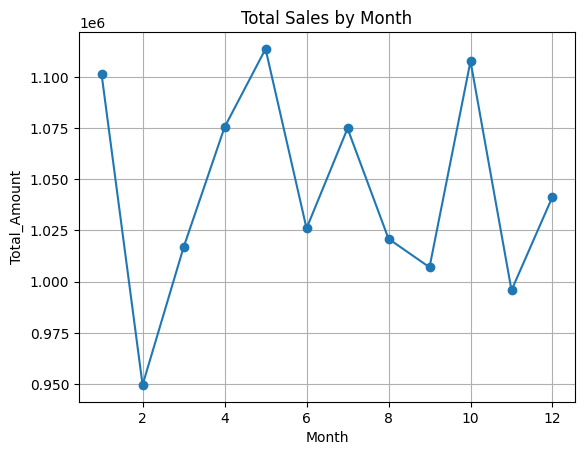

In [29]:
df.groupby('month')['Total_Amount'].sum().plot(kind='line', marker='o')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total_Amount')
plt.grid(True)
plt.show()

In [31]:
df.groupby('month')['Total_Amount'].sum().sort_values(ascending=False).head(1)

,Total_Amount
month,
5,1113683.5


**Therefore, based on this, May, the fifth month, has the largest sales, with a total of about 1.1 million.**

Task 3: **Advanced Analysis**

In [32]:
df = pd.read_csv('ecommerce_sales_cleaned.csv')

In [33]:
df

,Unnamed: 0,Order_ID,Customer_ID,Product,Category,Quantity,Price,Order_Date,Customer_Age,Customer_Gender,Region,Payment_Method,Total_Amount
0,0,1,C00001,Product_1,Electronics,7,181.67,2024-08-22,20,Female,South,Cash,1271.69
1,1,2,C00002,Product_2,Electronics,4,58.60,2023-08-29,58,Female,North,Credit Card,234.40
2,2,3,C00003,Product_3,Books,8,213.33,2024-05-11,46,Male,East,Credit Card,1706.64
3,3,4,C00004,Product_4,Clothing,5,364.92,2024-05-11,54,Other,South,Credit Card,1824.60
4,4,5,C00005,Product_5,Clothing,7,58.11,2024-11-19,72,Other,South,Cash,406.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10005,10075,7489,C07489,Product_7489,Books,9,478.35,2024-07-09,38,Female,North,Credit Card,4305.15
10006,10083,3044,C03044,Product_3044,Home & Kitchen,8,437.26,2024-07-09,34,Male,East,Credit Card,3498.08
10007,10089,5845,C05845,Product_5845,Electronics,5,207.91,2023-03-20,22,Female,South,PayPal,1039.55
10008,10094,7927,C07927,Product_7927,Toys,9,213.57,2024-08-28,36,Male,West,Credit Card,1922.13


1. **Correlation Analysis:**

    Compute the correlation matrix for Quantity , Price , Total_Amount , and Customer_Age using NumPy.
    Visualize the correlation matrix as a heatmap using Matplotlib.



In [35]:
col = ['Quantity', 'Price', 'Total_Amount', 'Customer_Age']
df_for_correlation = df[col]

correlation_matrix = df_for_correlation.corr()

correlation_matrix

,Quantity,Price,Total_Amount,Customer_Age
Quantity,1.000000,-0.008839,0.628880,-0.006654
Price,-0.008839,1.000000,0.684687,-0.022911
Total_Amount,0.628880,0.684687,1.000000,-0.029973
Customer_Age,-0.006654,-0.022911,-0.029973,1.000000


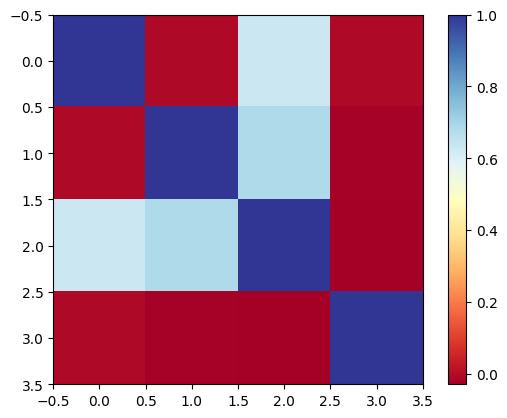

In [36]:
plt.imshow(correlation_matrix, cmap='RdYlBu')
plt.colorbar()

2. **Customer Segmentation:**

    Group customers by Customer_ID and compute their total Total_Amount and number of orders.
    Categorize customers into three segments based on total spending: Low (< 500-2000) High(<2000).
    Create a pie chart showing the proportion of customers in each segment.

In [37]:
df.groupby('Customer_ID')['Total_Amount'].sum().reset_index()

,Customer_ID,Total_Amount
0,C00001,1271.69
1,C00002,234.40
2,C00003,1706.64
3,C00004,1824.60
4,C00005,406.77
...,...,...
9995,C09996,289.07
9996,C09997,708.05
9997,C09998,1796.58
9998,C09999,3410.28


In [38]:
df.groupby('Customer_ID')['Order_ID'].count().sort_values(ascending=False).reset_index()

,Customer_ID,Order_ID
0,C07634,2
1,C03044,2
2,C07927,2
3,C05023,2
4,C09232,2
...,...,...
9995,C03338,1
9996,C03339,1
9997,C03340,1
9998,C03341,1


In [39]:
# Categorize customers into 3 categories based on total spending (<500 = Low, 500-2000 = Medium, >2000 = High)
customer_spending = df.groupby('Customer_ID')['Total_Amount'].sum().reset_index()

bins = [0, 500, 2000, 4500]
labels = ['Low', 'Medium', 'High']

customer_spending['Spending_Category'] = pd.cut(customer_spending['Total_Amount'],
                                                bins=bins,
                                                labels=labels,
                                                right=False)
customer_spending

,Customer_ID,Total_Amount,Spending_Category
0,C00001,1271.69,Medium
1,C00002,234.40,Low
2,C00003,1706.64,Medium
3,C00004,1824.60,Medium
4,C00005,406.77,Low
...,...,...,...
9995,C09996,289.07,Low
9996,C09997,708.05,Medium
9997,C09998,1796.58,Medium
9998,C09999,3410.28,High


In [40]:
# Create a pie chart showing the proportion of customers in each section

category_counts = df['Category'].value_counts()

category_counts

,count
Category,
Home & Kitchen,2072
Toys,2002
Clothing,1989
Electronics,1978
Books,1969


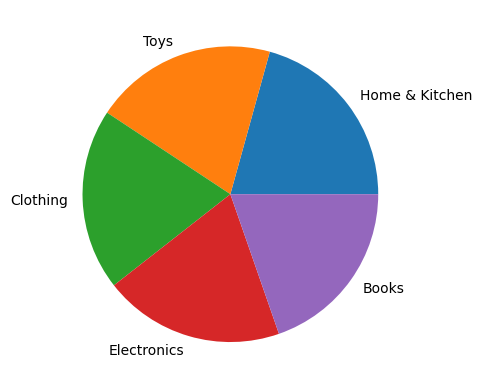

In [41]:
plt.pie(category_counts, labels=category_counts.index)
plt.show()

3. **Regional Analysis:**

    Group by Region and compute the average Total_Amount and total Quantity
    Create a stacked bar plot showing the Total_Amount by Category for each Region

In [42]:
group_by_total_amount_mean = (df.groupby('Region')['Total_Amount'].mean().reset_index()).round(2)
group_by_total_quantity_sum = df.groupby('Region')['Quantity'].sum().reset_index()

group_by_total_amount_mean

,Region,Total_Amount
0,East,1243.28
1,North,1237.36
2,South,1251.69
3,West,1274.29


In [43]:
group_by_total_quantity_sum

,Region,Quantity
0,East,12571
1,North,12362
2,South,12336
3,West,12710


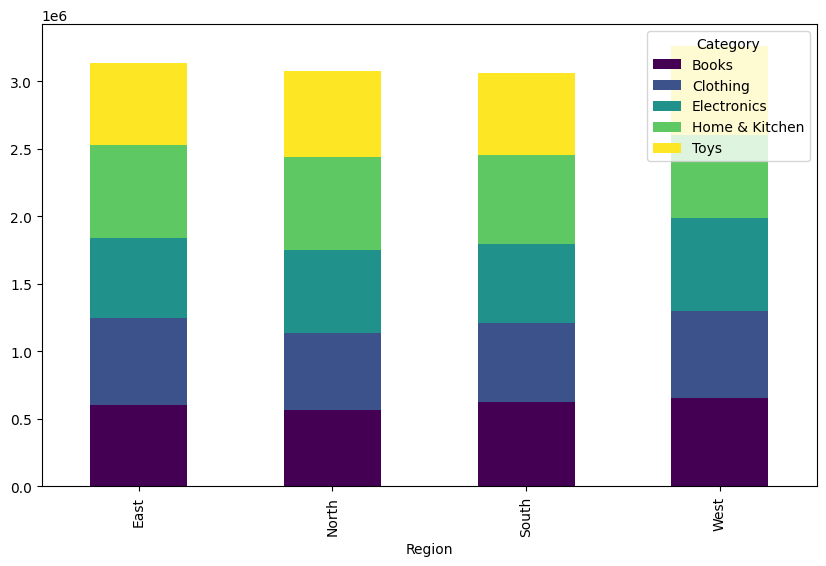

In [44]:
pivot = df.pivot_table(values='Total_Amount', index='Region', columns='Category', aggfunc='sum', fill_value=0)

pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.show()

4. **Payment Method Trends:**

    Analyze the preference of Payment_Method by Customer_Age groups (e.g., 18-30, 31-50, 51+).
    Visualize the results using a grouped bar plot.



In [45]:
bins = [0, 30, 50, float('inf')]
labels = ['18-30', '31-50', '51+']
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=True)

age_payment = pd.crosstab(df['Age_Group'], df['Payment_Method'])
age_payment_percent = (age_payment.div(age_payment.sum(axis=1), axis=0) * 100).round(2)

age_payment_percent

Payment_Method,Cash,Credit Card,Debit Card,PayPal
Age_Group,,,,
18-30,24.90,25.05,27.21,22.84
31-50,23.45,25.81,25.59,25.16
51+,25.97,24.31,25.97,23.76


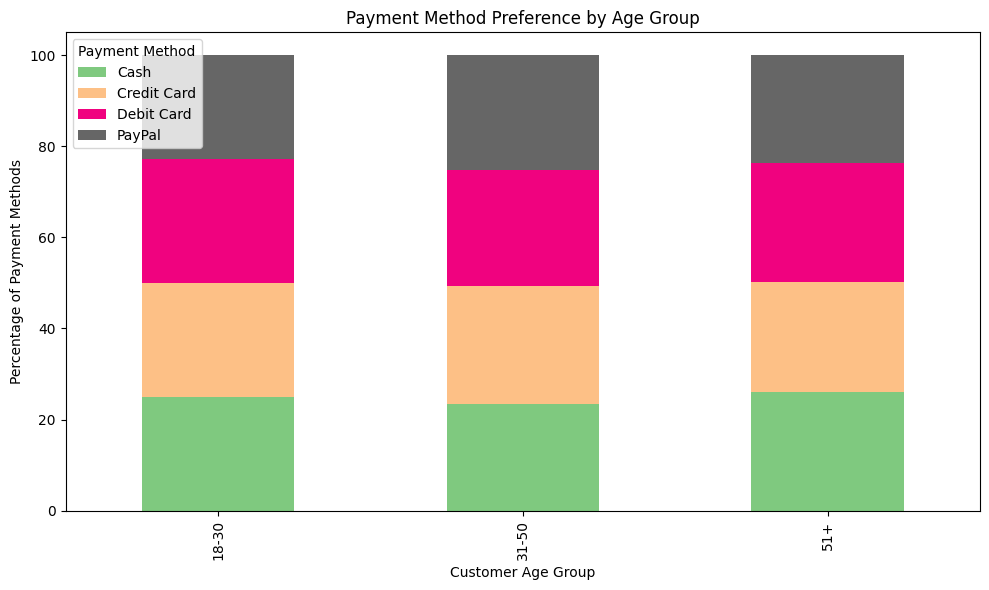

In [46]:
age_payment_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent')

plt.title('Payment Method Preference by Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Percentage of Payment Methods')
plt.legend(title='Payment Method', loc='upper left')
plt.tight_layout()
plt.show()

#Task 4: **Insights and Visualization**

1. **Key Insights:**

    Summarize at least five actionable insights based on your analysis (e.g., which category performs best, which region has growth potential, etc.).
    Support each insight with relevant data or visualizations.

In [47]:
df.groupby('Category')['Order_ID'].count().sort_values(ascending=False)

,Order_ID
Category,
Home & Kitchen,2072
Toys,2002
Clothing,1989
Electronics,1978
Books,1969


In [48]:
age_grouped = df.groupby('Age_Group')['Order_ID'].count().sort_values(ascending=False)

/tmp/ipython-input-2257903637.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df.groupby('Age_Group')['Order_ID'].count().sort_values(ascending=False)


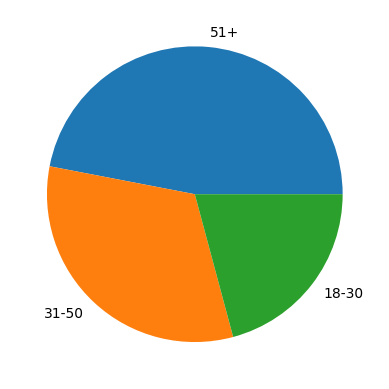

In [49]:
plt.pie(age_grouped, labels=age_grouped.index)
plt.show()

In [50]:
gender_grouped = df.groupby('Customer_Gender')['Total_Amount'].sum().sort_values(ascending=False).reset_index()

<BarContainer object of 3 artists>

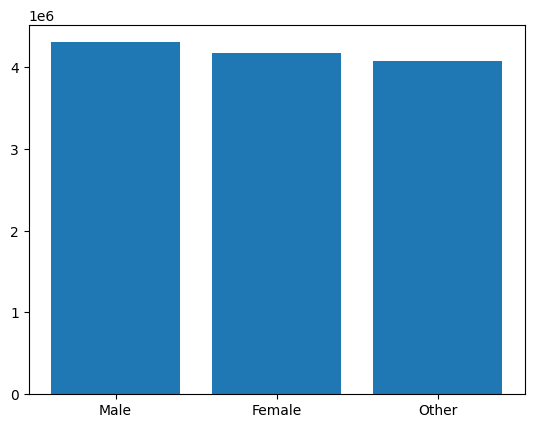

In [51]:
plt.bar(gender_grouped['Customer_Gender'], gender_grouped['Total_Amount'])

**We need to target females more because sales to females are much less then that of Males**



In [52]:
(df.groupby('Customer_Gender')['Total_Amount'].mean().sort_values(ascending=False)).round(0)

,Total_Amount
Customer_Gender,
Female,1276.0
Male,1244.0
Other,1236.0


In [53]:
group_by_region = df.groupby('Region')['Total_Amount'].sum().sort_values(ascending=False)
percentage_by_region = (group_by_region / group_by_region.sum()) * 100
(percentage_by_region).round(1)

,Total_Amount
Region,
West,26.0
East,25.0
North,24.5
South,24.4


**Females spends 30 dollars more then on average then that of men and our females customers are also lagging behind, so there is a need of attract and target more females**

In [54]:
group_by_region = df.groupby('Region')['Total_Amount'].sum().sort_values(ascending=False)
percentage_by_region = (group_by_region / group_by_region.sum()) * 100
(percentage_by_region).round(1)

,Total_Amount
Region,
West,26.0
East,25.0
North,24.5
South,24.4


**West region has the greatest share of total sales i.e. 26% and south has the least share of sales i.e. 24.4%**


2. **Dashboard:**

    Create a single figure with four subplots using Matplotlib:

    A bar plot of total sales by Category .
    A line plot of monthly sales trends.
    A pie chart of customer spending segments.
    A boxplot of Total_Amount by Region .

    Ensure the dashboard is well-labeled and visually appealing.

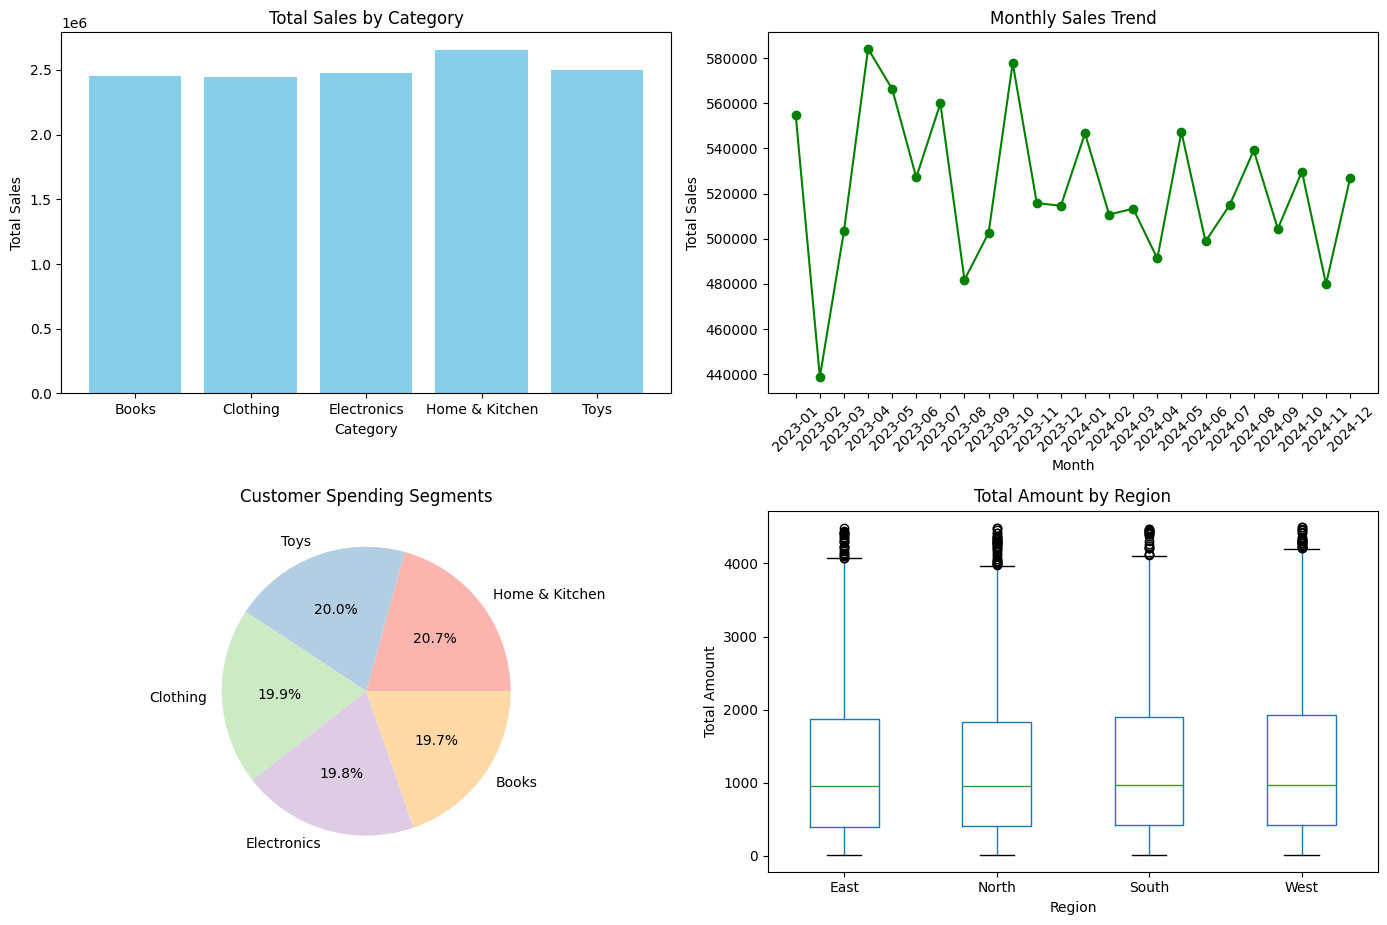

In [55]:
import matplotlib.pyplot as plt

df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

category_sales = df.groupby('Category')['Total_Amount'].sum()
monthly_sales = df.groupby(df['Order_Date'].dt.to_period('M').astype(str))['Total_Amount'].sum()
segment_counts = df['Category'].value_counts()
region_order = df['Region'].unique()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Sales Overview Dashboard', fontsize=16, fontweight='bold')

axs[0, 0].bar(category_sales.index, category_sales.values, color='skyblue')
axs[0, 0].set_title('Total Sales by Category')
axs[0, 0].set_xlabel('Category')
axs[0, 0].set_ylabel('Total Sales')

axs[0, 1].plot(monthly_sales.index, monthly_sales.values, marker='o', color='green')
axs[0, 1].set_title('Monthly Sales Trend')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Total Sales')
axs[0, 1].tick_params(axis='x', rotation=45)

axs[1, 0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)
axs[1, 0].set_title('Customer Spending Segments')

df.boxplot(column='Total_Amount', by='Region', ax=axs[1, 1], grid=False)
axs[1, 1].set_title('Total Amount by Region')
axs[1, 1].set_xlabel('Region')
axs[1, 1].set_ylabel('Total Amount')
plt.suptitle('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Conclusion:**
This dashboard provides a comprehensive overview of sales performance across different dimensions. The first subplot shows that Home & Kitchen is the top-performing category in terms of total sales, while Clothing has the lowest. The monthly sales trend reveals fluctuations throughout the year, with May having the highest sales. The pie chart illustrates that the customer base is relatively evenly distributed among different categories. Finally, the boxplot of Total Amount by Region indicates that the West region has the highest average total amount, suggesting stronger sales performance in that region.